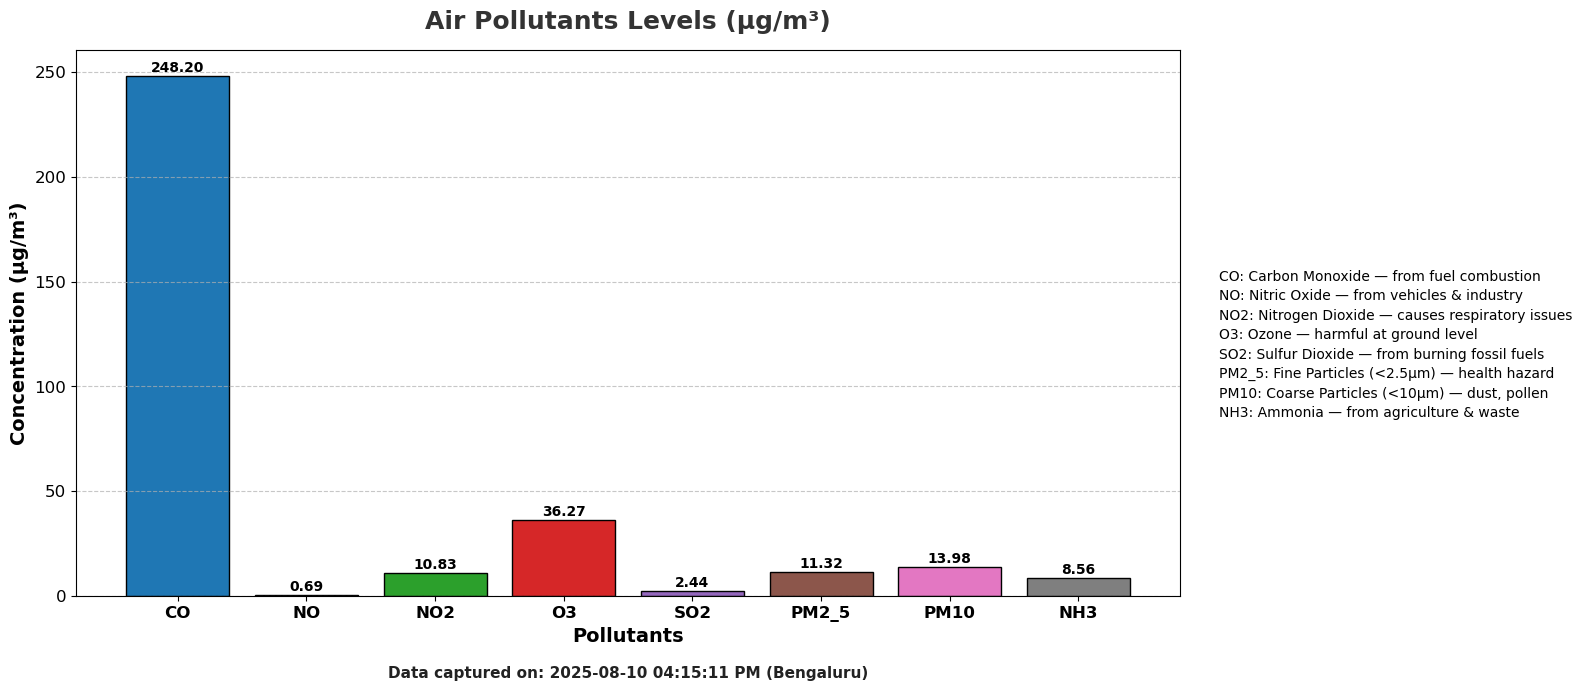

✅ Chart saved as air_quality_chart_2025-08-10_04-15-11_PM.png


In [1]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta

# Manually set city name or get it from saved data if you want
city_name = "Bengaluru"

def load_data(filename="air_quality_data.json"):
    with open(filename, "r") as f:
        data = json.load(f)
    return data

def plot_air_quality(data):
    pollutants = data['list'][0]['components']
    names = [gas.upper() for gas in pollutants.keys()]
    values = list(pollutants.values())

    pollutant_info = {
        "CO": "Carbon Monoxide — from fuel combustion",
        "NO": "Nitric Oxide — from vehicles & industry",
        "NO2": "Nitrogen Dioxide — causes respiratory issues",
        "O3": "Ozone — harmful at ground level",
        "SO2": "Sulfur Dioxide — from burning fossil fuels",
        "PM2_5": "Fine Particles (<2.5µm) — health hazard",
        "PM10": "Coarse Particles (<10µm) — dust, pollen",
        "NH3": "Ammonia — from agriculture & waste"
    }

    timestamp_unix = data['list'][0]['dt']
    dt_utc = datetime.fromtimestamp(timestamp_unix, tz=timezone.utc)
    ist_offset = timedelta(hours=5, minutes=30)
    ist = timezone(ist_offset)
    dt_local = dt_utc.astimezone(ist)
    timestamp_str = dt_local.strftime("%Y-%m-%d %I:%M:%S %p")

    plt.style.use('seaborn-v0_8-deep')
    fig, ax = plt.subplots(figsize=(12, 7))

    bars = ax.bar(names, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                                        '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'], edgecolor='black')

    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, value + 0.5, f"{value:.2f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_title("Air Pollutants Levels (μg/m³)", fontsize=18, fontweight='bold', color='#333333', pad=15)
    ax.set_xlabel("Pollutants", fontsize=14, fontweight='bold')
    ax.set_ylabel("Concentration (μg/m³)", fontsize=14, fontweight='bold')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)

    description_text = "\n".join([f"{k}: {v}" for k, v in pollutant_info.items()])
    plt.gcf().text(1.02, 0.5, description_text, fontsize=10, va='center', ha='left', linespacing=1.5)

    ax.text(0.5, -0.15, f"Data captured on: {timestamp_str} ({city_name})", 
            transform=ax.transAxes, fontsize=11, fontweight='bold', color='#222222', ha='center')

    plt.tight_layout()

    filename = f"air_quality_chart_{dt_local.strftime('%Y-%m-%d_%I-%M-%S_%p')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✅ Chart saved as {filename}")

def main():
    data = load_data()
    plot_air_quality(data)

if __name__ == "__main__":
    main()
